# **DATA UNDERSTANDING** - Iris

## Struktur Dataset
- **Jumlah baris** : 150
- **Jumlah kolom** : 5
- **Kolom dan tipe data** :
  - `sepal_length` → Decimal Number (cm)
  - `sepal_width`  → Decimal Number (cm)
  - `petal_length` → Decimal Number (cm)
  - `petal_width`  → Decimal Number (cm)
  - `species`      → Text (kategori: setosa, versicolor, virginica)

---

## Statistik Deskriptif
Hasil eksplorasi awal menunjukkan:

- **Sepal Length** : min = 4.3
- **Sepal Width**  : min = 2.0   
- **Petal Length** : min = 1.0   
- **Petal Width**  : min = 0.1

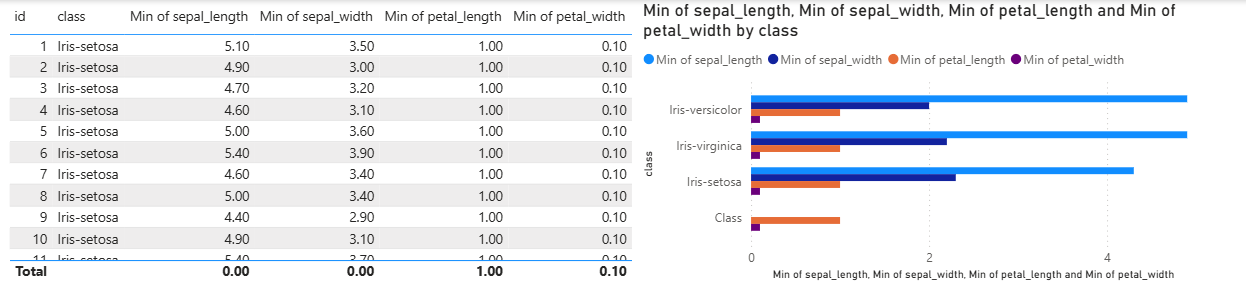

Nilai minimum ini menunjukkan batas bawah ukuran setiap fitur. Terlihat bahwa bunga Iris-setosa memiliki ukuran petal yang paling kecil dibandingkan kelas lainnya.

---

- **Sepal Length** :  max = 7.9
- **Sepal Width**  :  max = 4.4
- **Petal Length** :  max = 6.9
- **Petal Width**  :  max = 2.5

Bunga Iris-virginica cenderung memiliki ukuran paling besar untuk petal dan sepal length, sedangkan Iris-setosa unggul di sepal width.

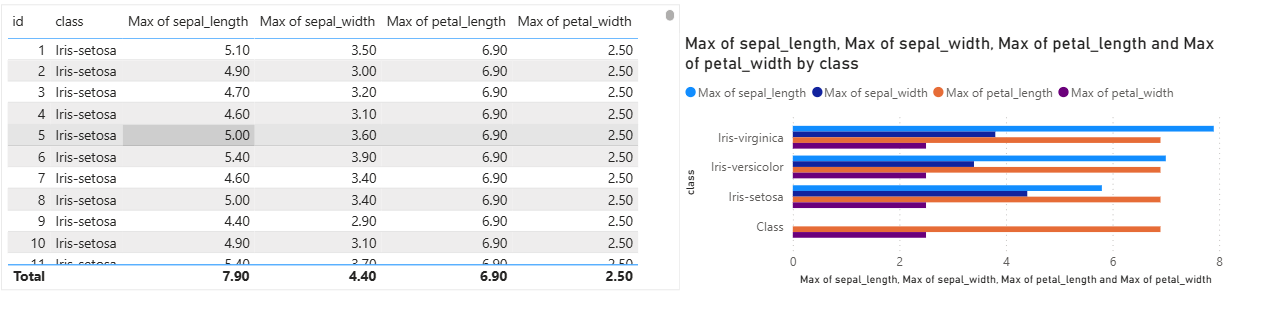---


Grafik batang dibawah menunjukkan perbandingan 4 ukuran rata-rata (panjang & lebar kelopak/sepal dan mahkota/petal) untuk setiap kelas bunga.

* **Iris-virginica**
    * Memiliki **panjang kelopak (sepal length) rata-rata paling panjang**.
    * Memiliki **panjang mahkota (petal length) rata-rata paling panjang**.
    * Ukurannya secara umum adalah yang terbesar di antara ketiganya.

* **Iris-setosa**
    * Sangat unik dan mudah dibedakan.
    * Memiliki **lebar kelopak (sepal width) rata-rata paling lebar**.
    * Namun, memiliki **panjang mahkota (petal length) dan lebar mahkota (petal width) yang paling pendek dan paling sempit** secara signifikan.

* **Iris-versicolor**
    * Ciri-cirinya berada **di tengah-tengah** antara Virginica dan Setosa untuk semua kategori ukuran.


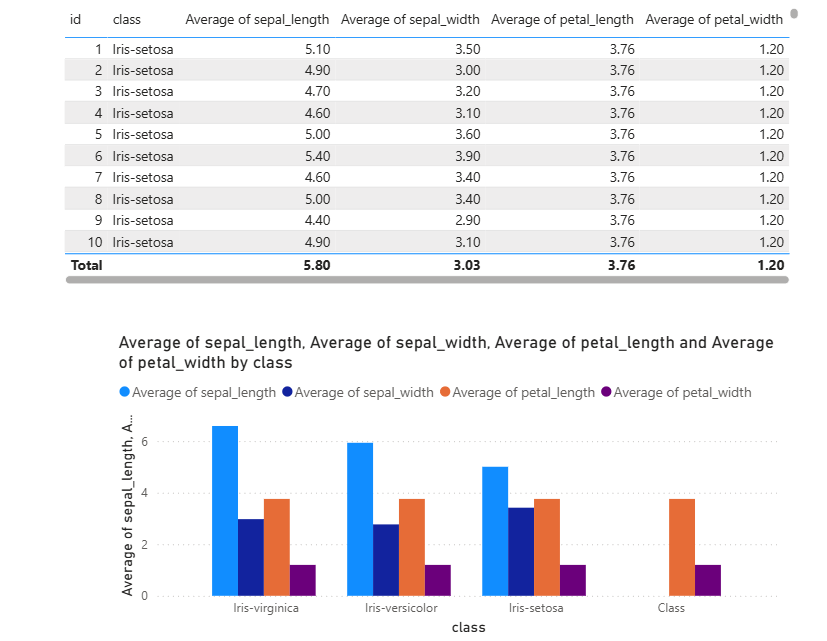---

### Penjelasan Grafik Distribusi Fitur

Grafik menunjukkan perbandingan jumlah data antara dua fitur
(panjang dan lebar kelopak) dalam setiap kelas.

Hasilnya selalu **50% berbanding 50%** karena setiap bunga
pasti memiliki satu nilai panjang dan satu nilai lebar.

Dengan demikian, jumlahnya selalu sama untuk setiap kelas,
sehingga porsinya menjadi seimbang.

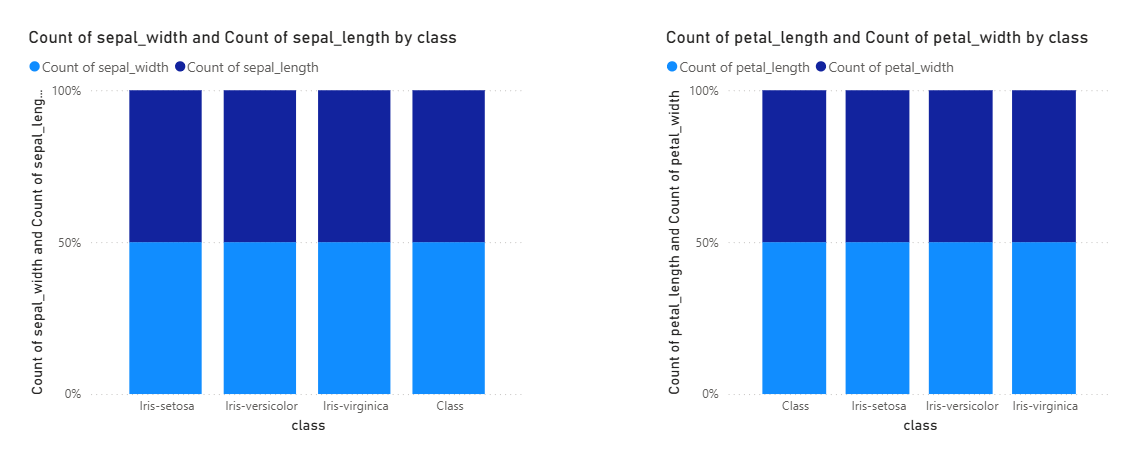

## Menarik Data dari 2 datbase ke Power BI menggunakan script python

1. Buka power BI pastikan versi python sudah sesuai dengan yang anda gunakan. Pergi ke menu File -> Options and settings -> Options -> Python Scripting. Jika sudah sesuai klik "OK".

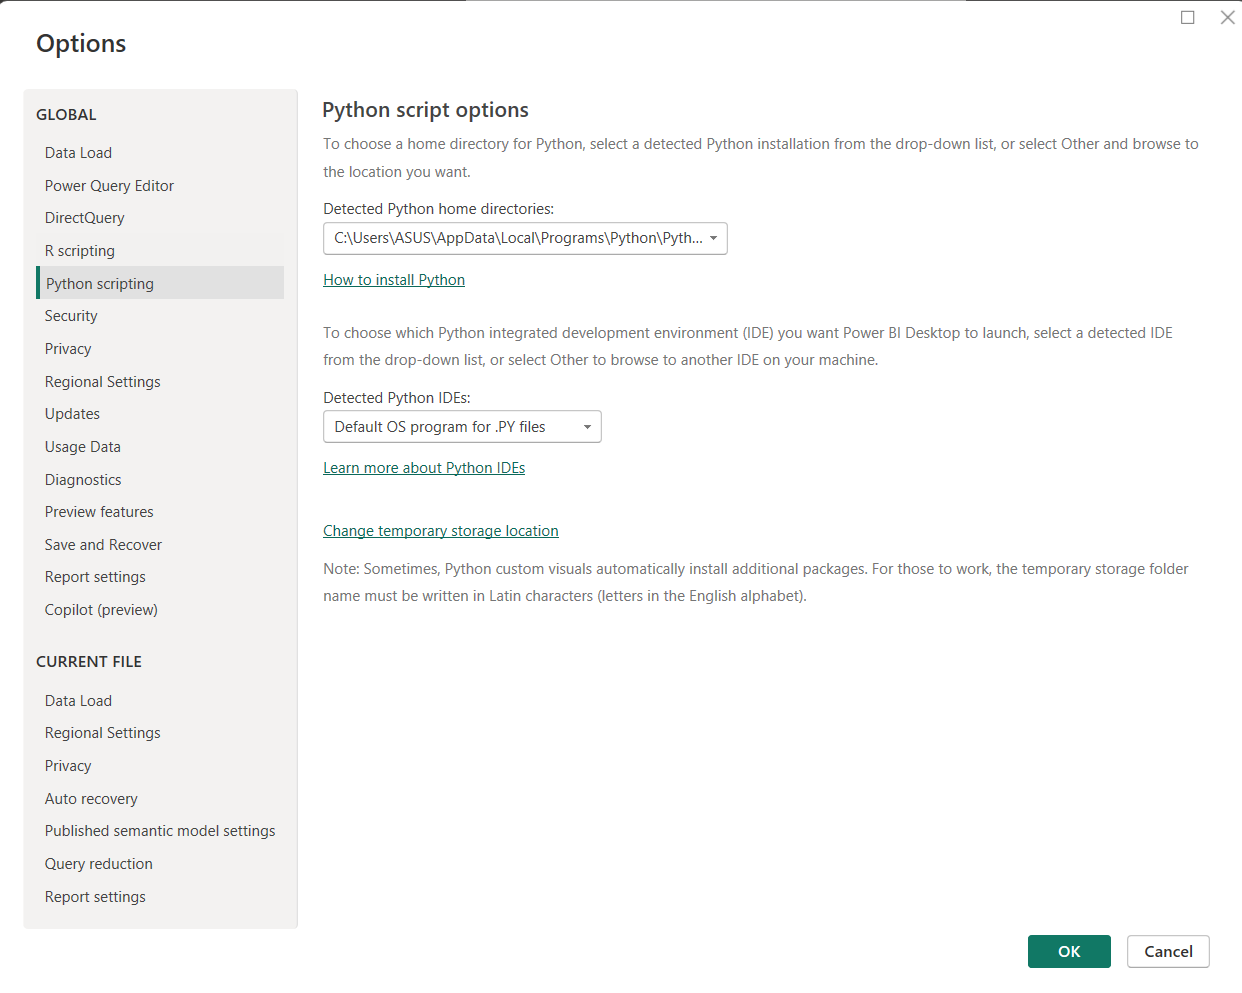

2. Pilih menu Get Data -> Python Script. Kemudian masukkan Script python untuk koneksi ke database. Sesuaikan dengan koneksi database anda

```
import pandas as pd
from sqlalchemy import create_engine

# Koneksi ke MySQL
MYSQL_HOST = ""
MYSQL_PORT =
MYSQL_USER = "root"
MYSQL_PASSWORD = ""
MYSQL_DATABASE = ""

# Koneksi ke PostgreSQL
PG_HOST = ""
PG_PORT = 5432
PG_USER = ""
PG_PASSWORD = ""
PG_DATABASE = ""

# Gunakan SQLAlchemy untuk koneksi ke MySQL
mysql_engine = create_engine(
    f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DATABASE}"
)

# Gunakan SQLAlchemy untuk koneksi ke PostgreSQL
pg_engine = create_engine(
    f"postgresql+psycopg2://{PG_USER}:{PG_PASSWORD}@{PG_HOST}:{PG_PORT}/{PG_DATABASE}"
)

# Jalankan query
mysql_query = "SELECT * FROM iris_data;"
df_mysql = pd.read_sql(mysql_query, mysql_engine)

pg_query = "SELECT * FROM iris_data;"
df_postgres = pd.read_sql(pg_query, pg_engine)

# Print hasil
print("Data dari MySQL:")
print(df_mysql.head())

print("\nData dari PostgreSQL:")
print(df_postgres.head())

df_combined = pd.merge(df_postgres, df_mysql.drop(columns=['class']), on="id", how="inner")

print("\nData gabungan:")
print(df_combined)

3. Jika koneksi sudah berhasil maka akan muncul tampilan di Navigator. Kemudian centang semua data lalu klik Load


---


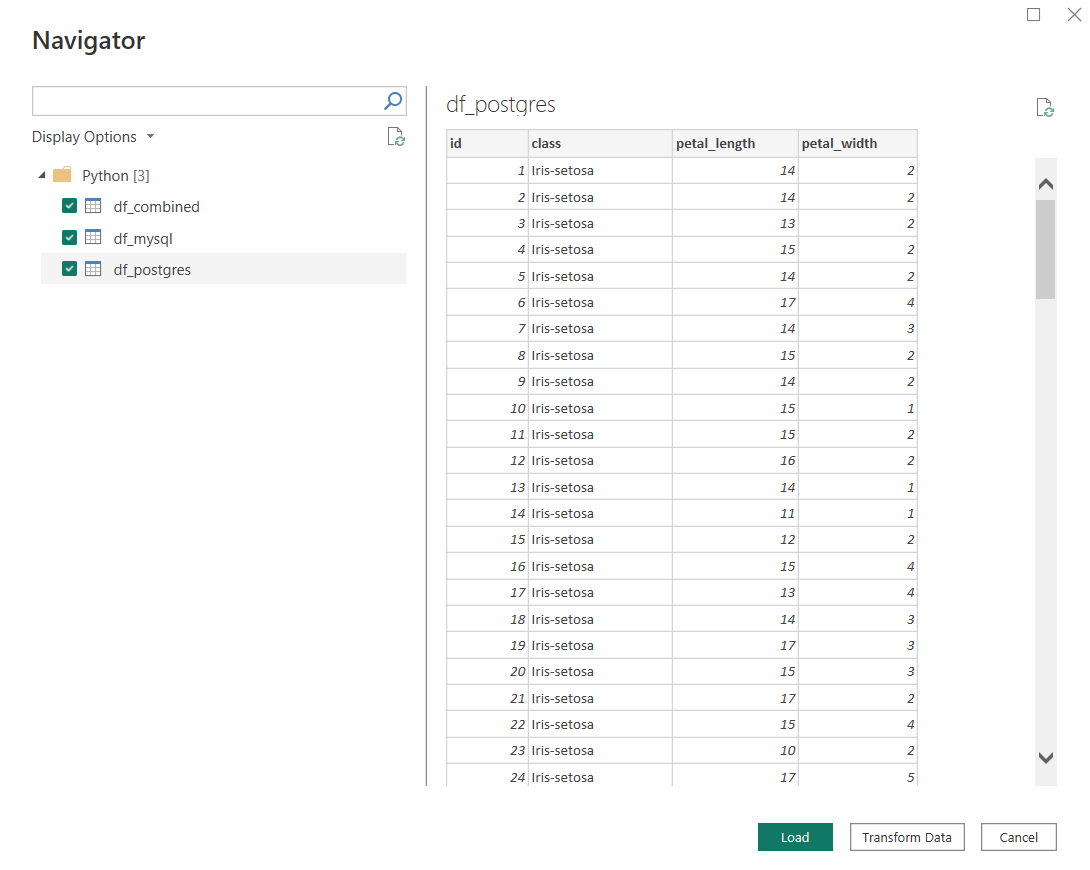

## Deteksi Outlier

In [2]:
import pandas as pd
from sqlalchemy import create_engine

# Koneksi ke MySQL
MYSQL_HOST = "mysql-3634ef1a-tugas-pendata.g.aivencloud.com"
MYSQL_PORT = 17416
MYSQL_USER = "avnadmin"
MYSQL_PASSWORD = "AVNS_2NRSFWfr9pGMEI7BSpA"
MYSQL_DATABASE = "defaultdb"

# Koneksi ke PostgreSQL
PG_HOST = "pg-359aec68-tugas-pendata.g.aivencloud.com"
PG_PORT = 17416
PG_USER = "avnadmin"
PG_PASSWORD = "AVNS_oal2yP3mG6JLIwX3BUK"
PG_DATABASE = "defaultdb"

# Gunakan SQLAlchemy untuk koneksi ke MySQL
mysql_engine = create_engine(
    f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DATABASE}"
)

# Gunakan SQLAlchemy untuk koneksi ke PostgreSQL
pg_engine = create_engine(
    f"postgresql+psycopg2://{PG_USER}:{PG_PASSWORD}@{PG_HOST}:{PG_PORT}/{PG_DATABASE}"
)

# Jalankan query
mysql_query = "SELECT * FROM iris_data;"
df_mysql = pd.read_sql(mysql_query, mysql_engine)

pg_query = "SELECT * FROM iris_data;"
df_postgres = pd.read_sql(pg_query, pg_engine)

# Print hasil
print("Data dari MySQL:")
print(df_mysql.head())

print("\nData dari PostgreSQL:")
print(df_postgres.head())

Data dari MySQL:
   id        class  petal_length  petal_width
0   1  Iris-setosa           1.4          0.2
1   2  Iris-setosa           1.4          0.2
2   3  Iris-setosa           1.3          0.2
3   4  Iris-setosa           1.5          0.2
4   5  Iris-setosa           1.4          0.2

Data dari PostgreSQL:
   id        class  sepal_length  sepal_width
0   1  Iris-setosa           5.1          3.5
1   2  Iris-setosa           4.9          3.0
2   3  Iris-setosa           4.7          3.2
3   4  Iris-setosa           4.6          3.1
4   5  Iris-setosa           5.0          3.6


In [3]:
import os
mysql_query = "SELECT * FROM iris_data;"
df_mysql = pd.read_sql(mysql_query, mysql_engine)

pg_query = "SELECT * FROM iris_data;"
df_postgres = pd.read_sql(pg_query, pg_engine)

# Print hasil query
print("Data dari MySQL:")
print(df_mysql.head())

print("\n Data dari PostgreSQL:")
print(df_postgres.head())

#Menghapus file yang di upload sebelumnya
if os.path.exists(".env"):
    os.remove(".env")

df_combined = pd.merge(df_postgres, df_mysql.drop(columns=['class']), on="id", how="inner")

print("\nData gabungan:")
print(df_combined)

Data dari MySQL:
   id        class  petal_length  petal_width
0   1  Iris-setosa           1.4          0.2
1   2  Iris-setosa           1.4          0.2
2   3  Iris-setosa           1.3          0.2
3   4  Iris-setosa           1.5          0.2
4   5  Iris-setosa           1.4          0.2

 Data dari PostgreSQL:
   id        class  sepal_length  sepal_width
0   1  Iris-setosa           5.1          3.5
1   2  Iris-setosa           4.9          3.0
2   3  Iris-setosa           4.7          3.2
3   4  Iris-setosa           4.6          3.1
4   5  Iris-setosa           5.0          3.6

Data gabungan:
      id           class  sepal_length  sepal_width  petal_length  petal_width
0      1     Iris-setosa           5.1          3.5           1.4          0.2
1      2     Iris-setosa           4.9          3.0           1.4          0.2
2      3     Iris-setosa           4.7          3.2           1.3          0.2
3      4     Iris-setosa           4.6          3.1           1.5          

### Deteksi Outlier menggunakan Pycaret
Pycaret adalah library python untuk menyederhanakan alur machine learning dari persiapan data, hingga penerapan model. Dengan PyCaret, kita dapat melakukan tugas-tugas seperti Preprocessing data, model training, dan lain lain dengan usaha pengkodean yang minimal, sehingga meningkatkan produktivitas dan mempercepat siklus eksperimen dalam proyek machine learning. Berikut-langkah langkahnya :


1. Buka command promt dan ketik **"pip install pycaret"** Disini saya menggunakan python versi 3.9.


---
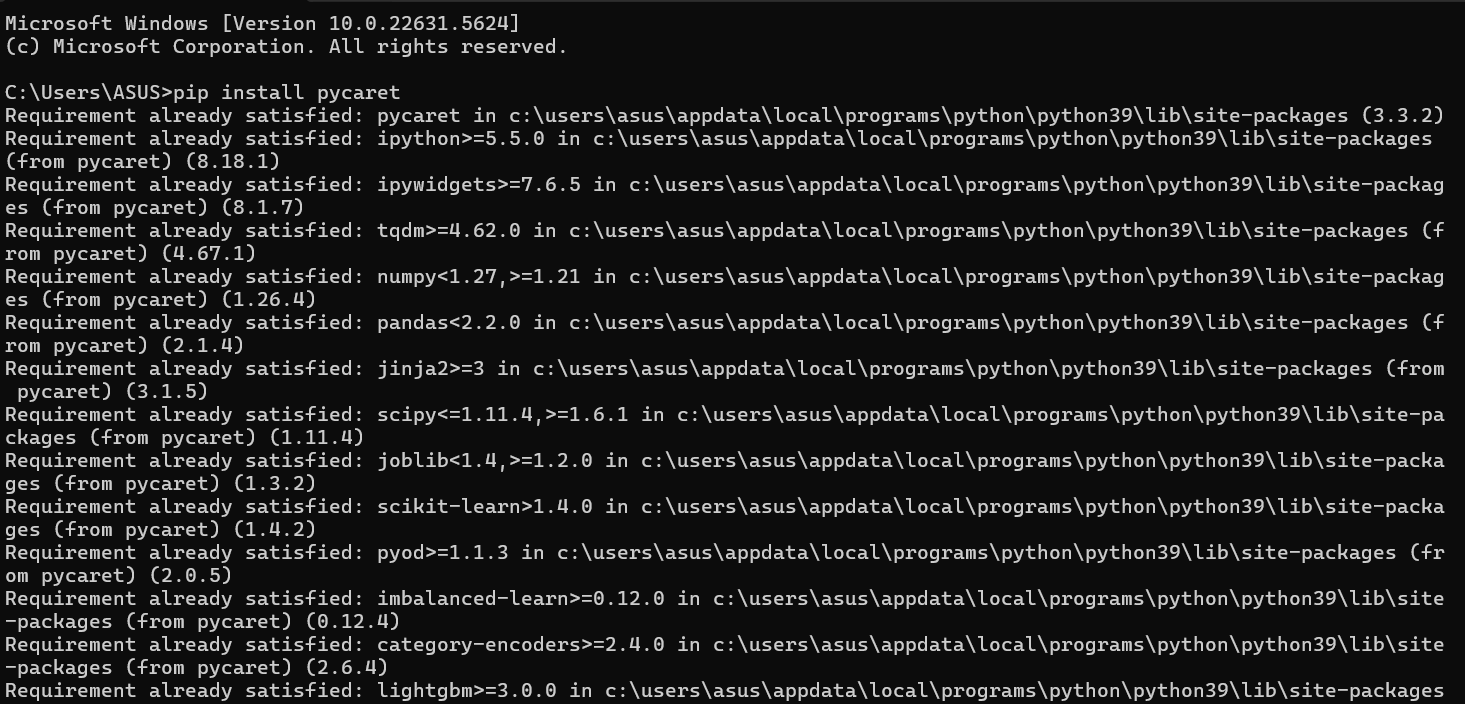

2. Kembali ke power BI klik menu Home -> Transform Data -> Transform -> Run Python Script. Kemudian mulai masukkan script python seperti contoh :

```
from pycaret.anomaly import *
import pandas as pd

df = dataset.copy()

if "class" in df.columns:
    df = df.drop("class", axis=1)

# Setup PyCaret (tanpa 'silent')
s = setup(data=df, session_id=123, verbose=False)

# Isolation Forest
model = create_model('iforest')

# Assign hasil
results = assign_model(model)

results
```


3. Setelah berhasil  muncul tabel yang berisi Data, Dataset, Result. Klik Result lalu Klik Table maka anda akan melihat hasil anomaly. Anomaly dengan angka 0 adalah bukan outlier, anomaly dengan angka 1 adalah outlier.


---


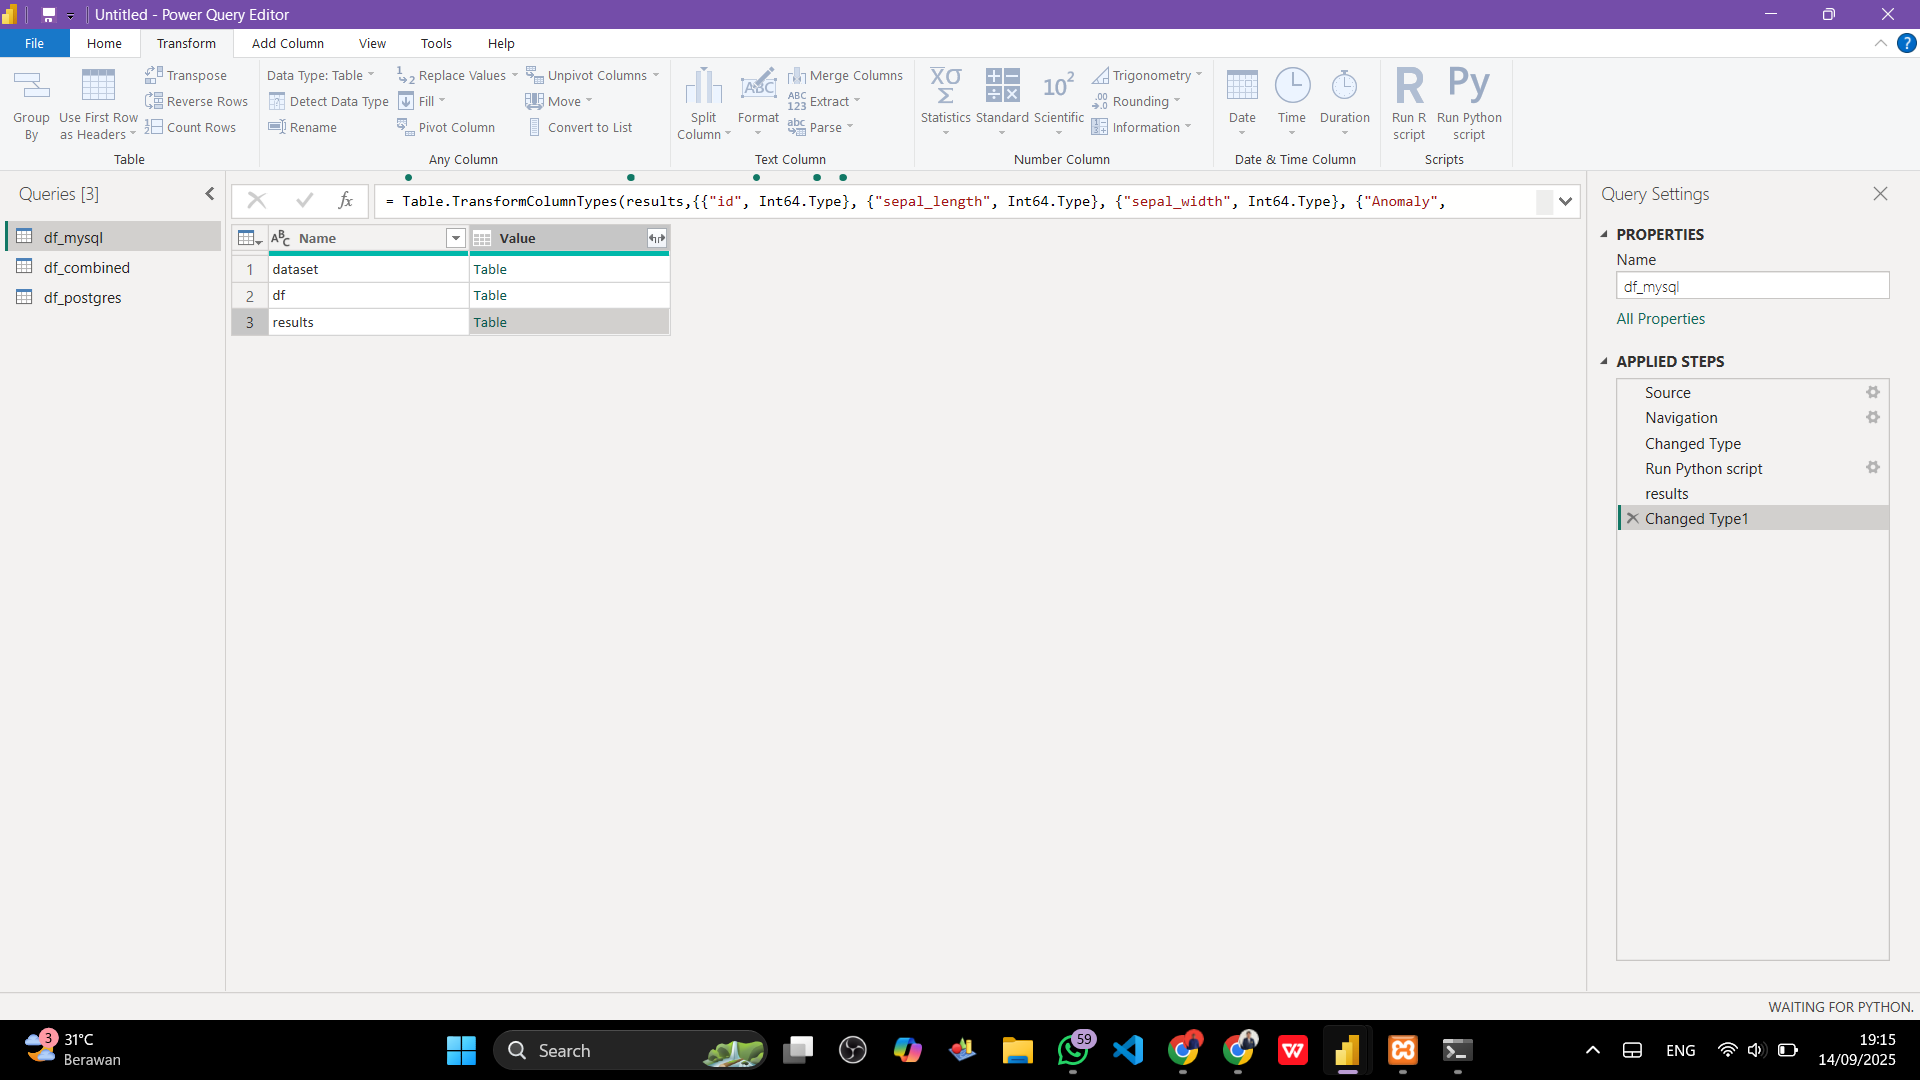

### Deteksi outlier menggunakan model ABOD

In [16]:
import pandas as pd
from pycaret.anomaly import *
from tabulate import tabulate


# Simpan target kalau ada
if "class" in df.columns:
    target = df["class"]
    df = df.drop("class", axis=1)
else:
    target = None

# ===  Setup PyCaret (pakai semua kolom numerik, kecuali id) ===
s = setup(data=df.drop(columns=["Id"]), session_id=123, verbose=False)

# ===  Buat model LOF dengan fraction 5% ===
lof = create_model("abod", fraction=0.05)

# ===  Assign hasil deteksi (Anomaly = 1 untuk outlier, 0 untuk inlier) ===
results = assign_model(lof)

# Tambahkan kembali kolom id
results["Id"] = df["Id"].values

# === 5. Ambil hanya outlier ===
outliers = results[results["Anomaly"] == 1][["Id", "Anomaly", "Anomaly_Score"]]

# === 6. Tampilkan daftar ID outlier ===
print(tabulate(outliers, headers="keys", tablefmt="grid"))
print(f"\nJumlah outlier: {len(outliers)}")


+-----+------+-----------+-----------------+
|     |   Id |   Anomaly |   Anomaly_Score |
+=====+======+===========+=================+
|  41 |   42 |         1 |      -0.0889983 |
+-----+------+-----------+-----------------+
|  62 |   63 |         1 |      -0.289391  |
+-----+------+-----------+-----------------+
| 106 |  107 |         1 |      -0.0158405 |
+-----+------+-----------+-----------------+
| 108 |  109 |         1 |      -0.0842239 |
+-----+------+-----------+-----------------+
| 117 |  118 |         1 |      -0.129286  |
+-----+------+-----------+-----------------+
| 119 |  120 |         1 |      -0.156213  |
+-----+------+-----------+-----------------+
| 131 |  132 |         1 |      -0.137417  |
+-----+------+-----------+-----------------+
| 134 |  135 |         1 |      -0.157793  |
+-----+------+-----------+-----------------+

Jumlah outlier: 8


### Deteksi outlier menggunakan model KNN

In [15]:
import pandas as pd
from pycaret.anomaly import *
from tabulate import tabulate


# Simpan target kalau ada
if "class" in df.columns:
    target = df["class"]
    df = df.drop("class", axis=1)
else:
    target = None

# ===  Setup PyCaret (pakai semua kolom numerik, kecuali id) ===
s = setup(data=df.drop(columns=["Id"]), session_id=123, verbose=False)

# ===  Buat model LOF dengan fraction 5% ===
lof = create_model("knn", fraction=0.05)

# ===  Assign hasil deteksi (Anomaly = 1 untuk outlier, 0 untuk inlier) ===
results = assign_model(lof)

# Tambahkan kembali kolom id
results["Id"] = df["Id"].values

# === 5. Ambil hanya outlier ===
outliers = results[results["Anomaly"] == 1][["Id", "Anomaly", "Anomaly_Score"]]

# === 6. Tampilkan daftar ID outlier ===
print(tabulate(outliers, headers="keys", tablefmt="grid"))
print(f"\nJumlah outlier: {len(outliers)}")


+-----+------+-----------+-----------------+
|     |   Id |   Anomaly |   Anomaly_Score |
+=====+======+===========+=================+
|  41 |   42 |         1 |        0.793726 |
+-----+------+-----------+-----------------+
|  57 |   58 |         1 |        0.787401 |
+-----+------+-----------+-----------------+
|  98 |   99 |         1 |        0.818535 |
+-----+------+-----------+-----------------+
| 106 |  107 |         1 |        1.249    |
+-----+------+-----------+-----------------+
| 109 |  110 |         1 |        0.806226 |
+-----+------+-----------+-----------------+
| 117 |  118 |         1 |        1.0198   |
+-----+------+-----------+-----------------+
| 118 |  119 |         1 |        0.964365 |
+-----+------+-----------+-----------------+
| 131 |  132 |         1 |        1.0247   |
+-----+------+-----------+-----------------+

Jumlah outlier: 8


### Deteksi outlier menggunakan model LOF

In [14]:
import pandas as pd
from pycaret.anomaly import *
from tabulate import tabulate


# Simpan target kalau ada
if "class" in df.columns:
    target = df["class"]
    df = df.drop("class", axis=1)
else:
    target = None

# ===  Setup PyCaret (pakai semua kolom numerik, kecuali id) ===
s = setup(data=df.drop(columns=["Id"]), session_id=123, verbose=False)

# ===  Buat model LOF dengan fraction 5% ===
lof = create_model("lof", fraction=0.05)

# ===  Assign hasil deteksi (Anomaly = 1 untuk outlier, 0 untuk inlier) ===
results = assign_model(lof)

# Tambahkan kembali kolom id
results["Id"] = df["Id"].values

# === 5. Ambil hanya outlier ===
outliers = results[results["Anomaly"] == 1][["Id", "Anomaly", "Anomaly_Score"]]

# === 6. Tampilkan daftar ID outlier ===
print(tabulate(outliers, headers="keys", tablefmt="grid"))
print(f"\nJumlah outlier: {len(outliers)}")


+-----+------+-----------+-----------------+
|     |   Id |   Anomaly |   Anomaly_Score |
+=====+======+===========+=================+
|  15 |   16 |         1 |         1.65363 |
+-----+------+-----------+-----------------+
|  41 |   42 |         1 |         1.77723 |
+-----+------+-----------+-----------------+
|  98 |   99 |         1 |         1.50815 |
+-----+------+-----------+-----------------+
| 106 |  107 |         1 |         1.72121 |
+-----+------+-----------+-----------------+
| 117 |  118 |         1 |         1.56142 |
+-----+------+-----------+-----------------+
| 118 |  119 |         1 |         1.61198 |
+-----+------+-----------+-----------------+
| 122 |  123 |         1 |         1.4797  |
+-----+------+-----------+-----------------+
| 131 |  132 |         1 |         1.5359  |
+-----+------+-----------+-----------------+

Jumlah outlier: 8


## Cek missing value menggunakan pycaret

Langkah-langkah mencari missing value :

1. Buka power BI klik menu Home -> Transform Data -> Transform -> Run Python Script. Kemudian mulai masukkan script python seperti contoh :

```
import pandas as pd

# load data
data = dataset.copy()

# cari missing value
loss = data.isnull().sum()

# ubah jadi dataframe
result = pd.DataFrame({
    'Column': loss.index,
    'MissingCount': loss.values
})

# tambahkan persentase biar lebih informatif
result['Percentage'] = (result['MissingCount'] / len(data)) * 100

# output ke Power BI
result

```

**Output** : Tiap kolom outputnya adalah 0 dikarenakan data iris adalah data yang sudah bebas dari missing value.

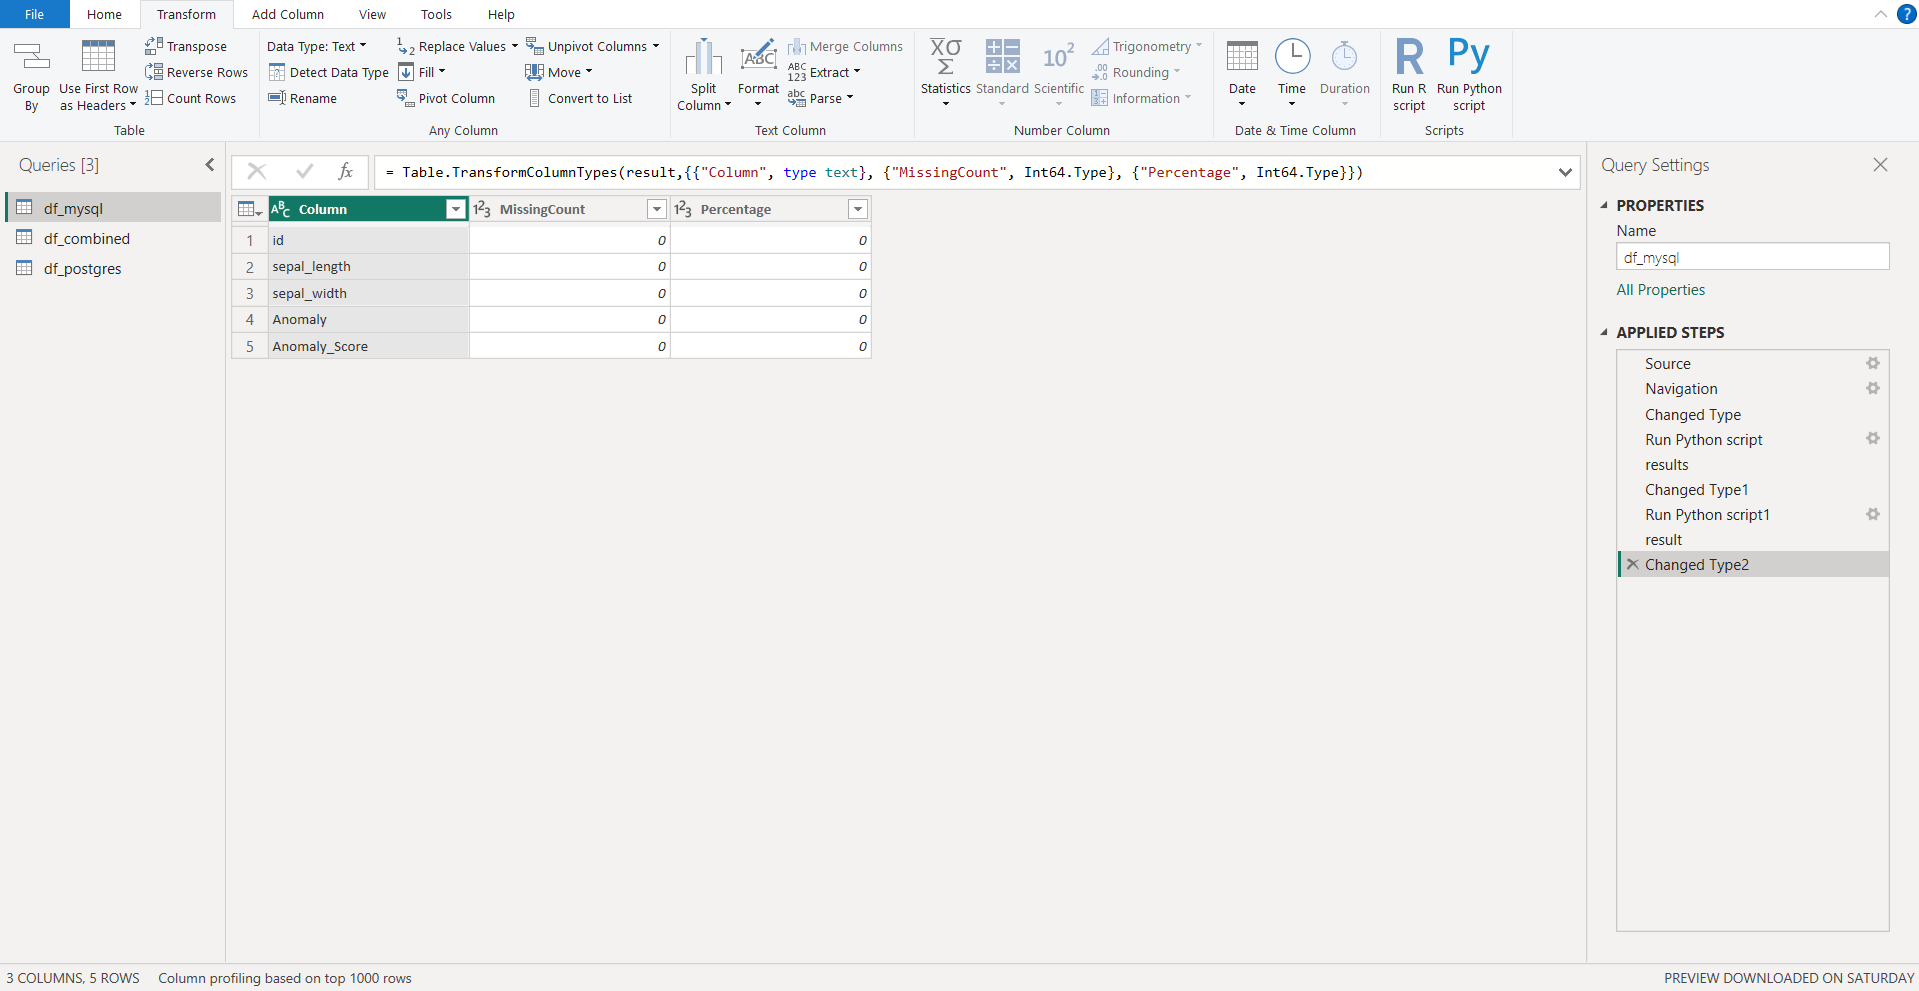